In [18]:
from sklearn.metrics import f1_score, accuracy_score
import sklearn.model_selection as ms
from plots import two_plots, four_plots
import pseudomodes as pds
import pandas as pd
import numpy as np
import test_utils
%matplotlib inline

In [19]:
df = pd.read_csv('hidden_test.csv.txt', sep=';')

In [20]:
lithology_numbers = {30000: 0,
                        65030: 1,
                        65000: 2,
                        80000: 3,
                        74000: 4,
                        70000: 5,
                        70032: 6,
                        88000: 7,
                        86000: 8,
                        99000: 9,
                        90000: 10,
                        93000: 11}

df['FORCE_2020_LITHOFACIES_LITHOLOGY'] = df.FORCE_2020_LITHOFACIES_LITHOLOGY.map(lithology_numbers)

In [21]:
facies = pds.DataHandlers(df, 'FORCE_2020_LITHOFACIES_LITHOLOGY')
df1 = facies.set_mnemonics()

In [22]:
facies = pds.PredictLabels(df1, 'DEPTH_MD')

In [23]:
X_train, X_test = ms.train_test_split(df1, test_size=0.3, random_state=20)

In [24]:
model, test_features = facies._train(train_df=X_train, 
                                     test_df=X_test.drop('FORCE_2020_LITHOFACIES_LITHOLOGY', axis=1), 
                                     target='FORCE_2020_LITHOFACIES_LITHOLOGY',
                                     model='XGB')

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), array([ 7826,  6938, 40174,  2418,   163,  4731,  1638,  3638,   336,
         539,   140], dtype=int64))
[17:02:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:1.93769	validation_1-mlogloss:1.93754
[10]	validation_0-mlogloss:0.58030	validation_1-mlogloss:0.57973
[20]	validation_0-mlogloss:0.22951	validation_1-mlogloss:0.22882
[30]	validation_0-mlogloss:0.10148	validation_1-mlogloss:0.10087
[40]	validation_0-mlogloss:0.05078	validation_1-mlogloss:0.05032
[50]	validation_0-mlogloss:0.02907	validation_1-mlogloss:0.02871
[60]	validation_0-mlogloss:0.01877	validation_1-mlogloss:0.01849
[70]	validation_0-mlogloss:0.01329	validation_1-mlogloss:0.01307

In [6]:
model, test_features = facies._train(train_df=df1[:110000], 
                                     test_df=df1[110000:].drop('FORCE_2020_LITHOFACIES_LITHOLOGY', axis=1), 
                                     target='FORCE_2020_LITHOFACIES_LITHOLOGY',
                                     model='RF')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   59.4s finished


In [26]:
predictions = model.predict(test_features)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.7s finished


In [25]:
predictions = facies.predict(model=model, test_df=test_features)

[0. 0. 0. ... 0. 0. 0.]


In [26]:
np.unique(predictions, return_counts=True)

(array([0.]), array([36720], dtype=int64))

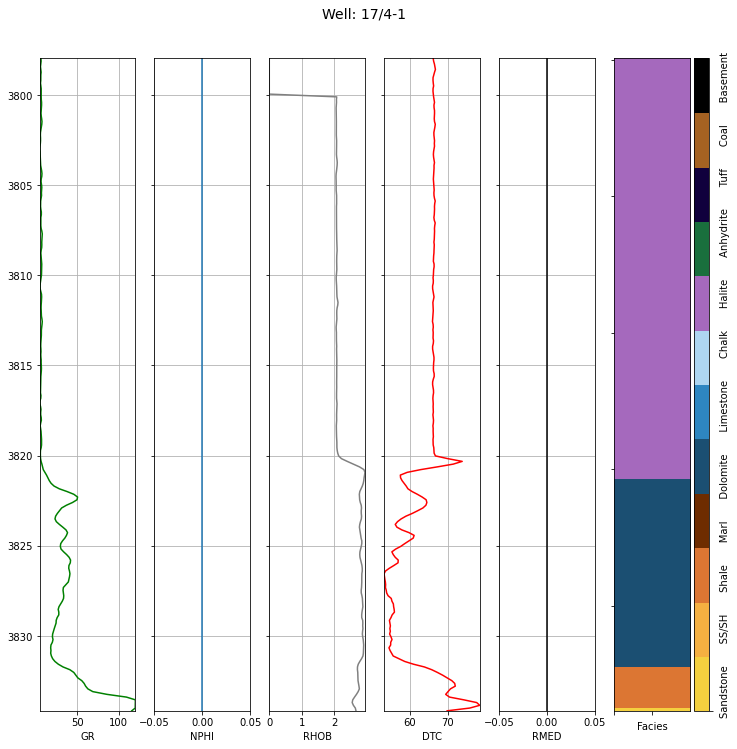

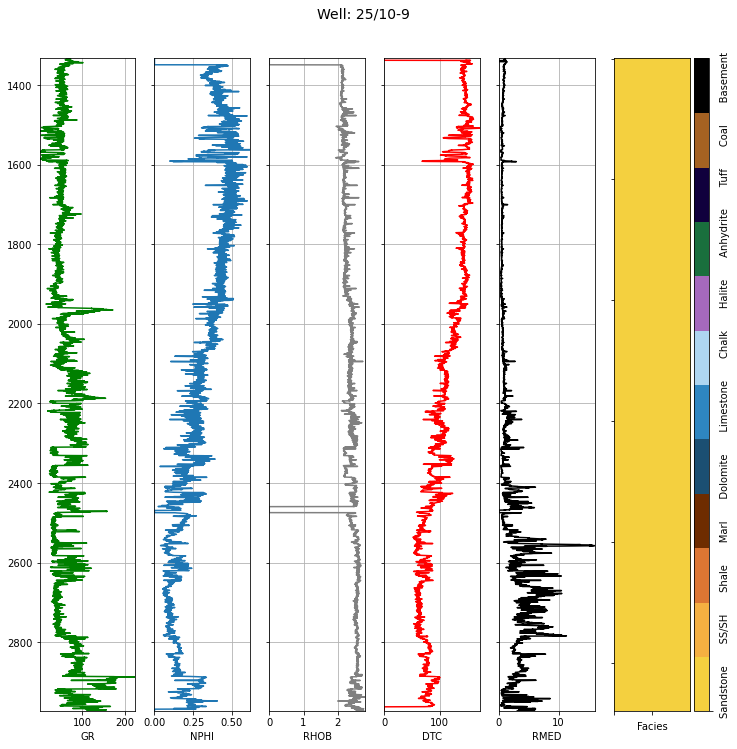

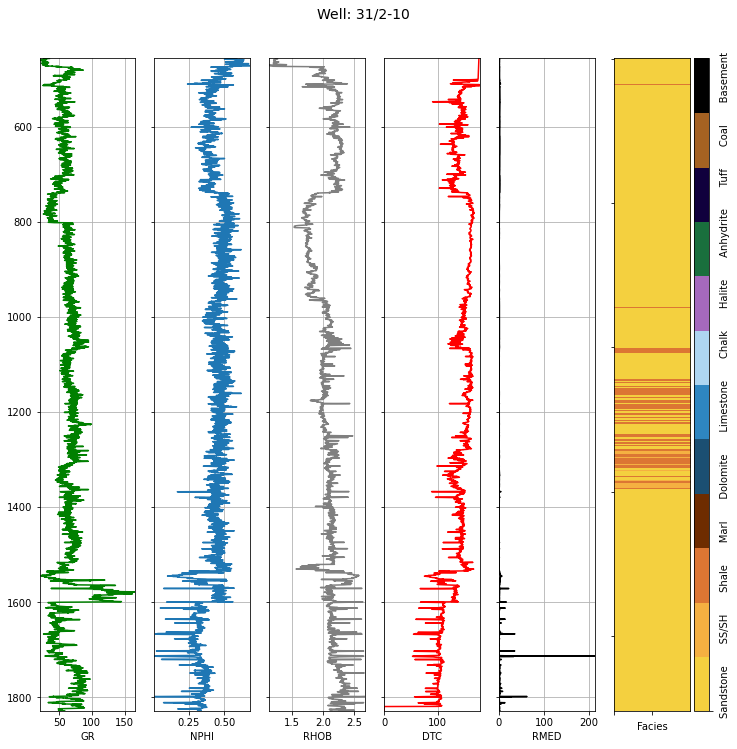

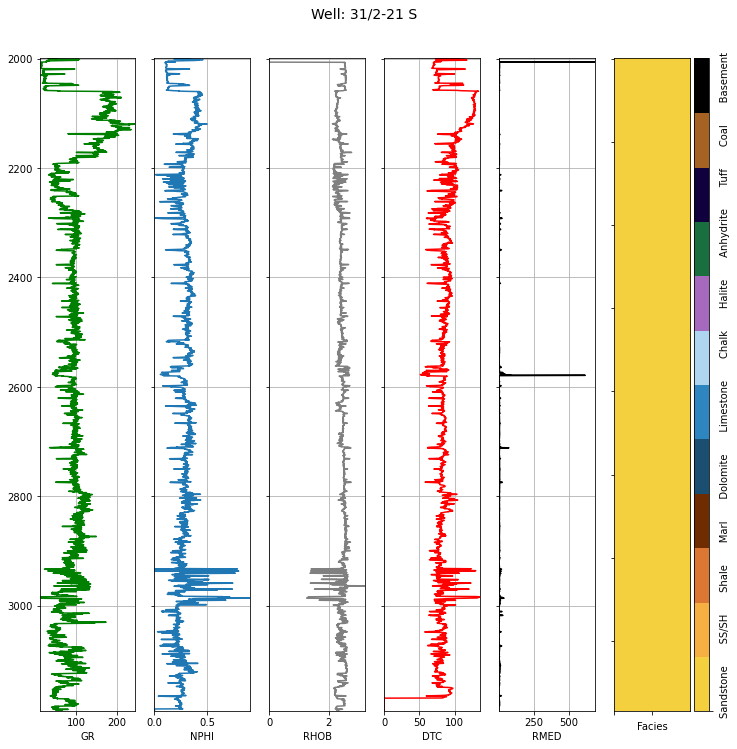

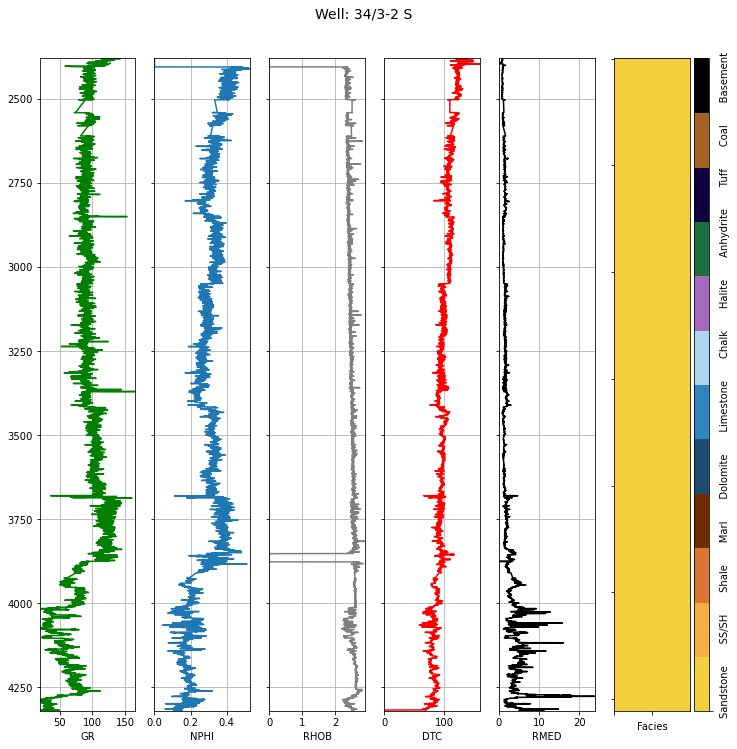

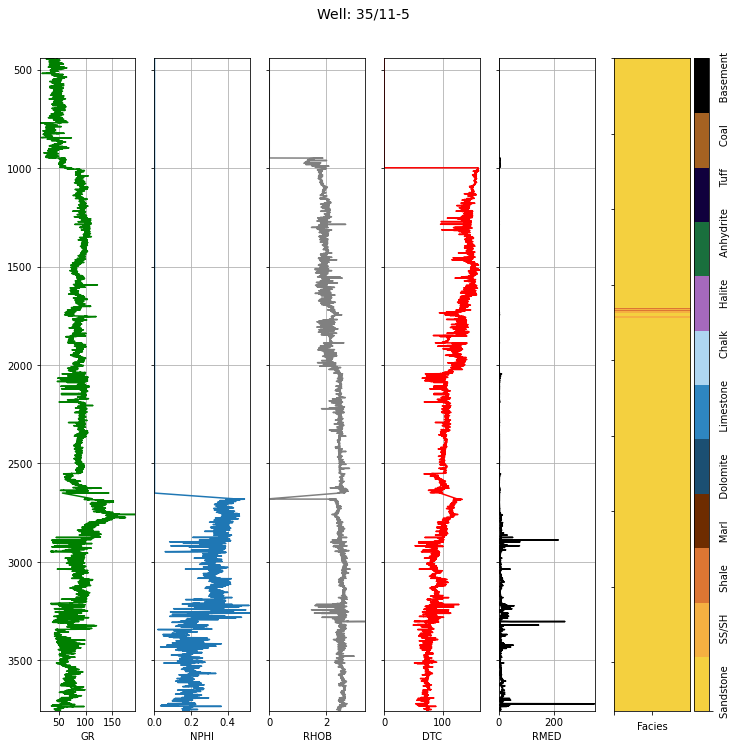

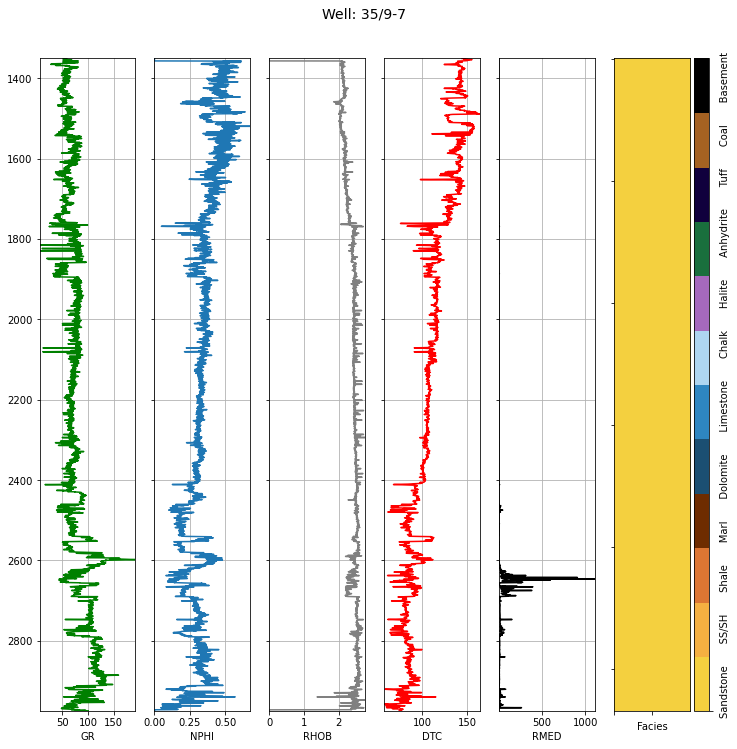

In [10]:
facies.plot_lithofacies(df1[50000:], predictions, log1='GR', log2='NPHI', 
                        log3='RHOB', log4='DTC', log5='RMED', depth_col='DEPTH_MD')

In [28]:
labels = X_test.FORCE_2020_LITHOFACIES_LITHOLOGY

In [29]:
test_utils.show_evaluation(predictions, labels)   # hidden test data

Default score: -2.9505
Accuracy is: 11.61%
F1 is: 20.8%


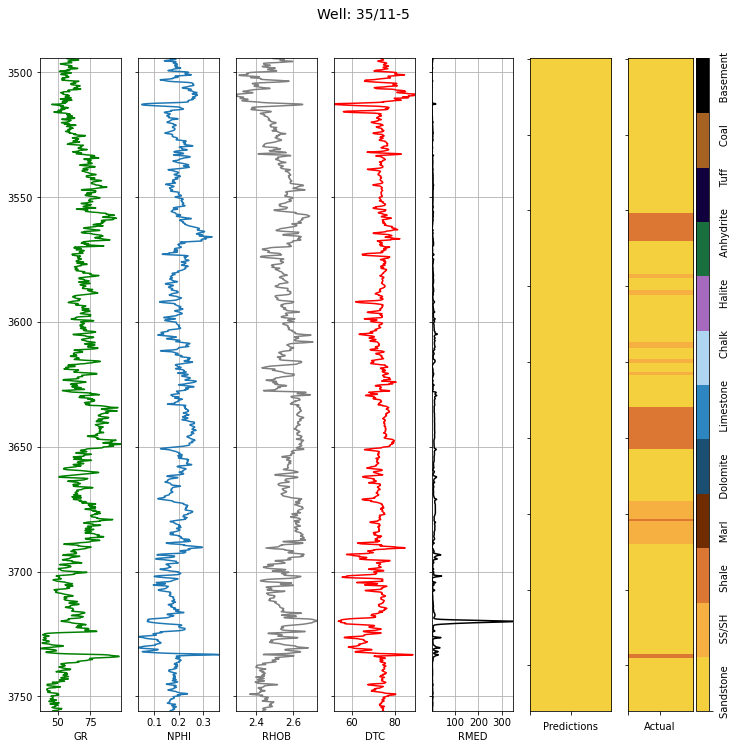

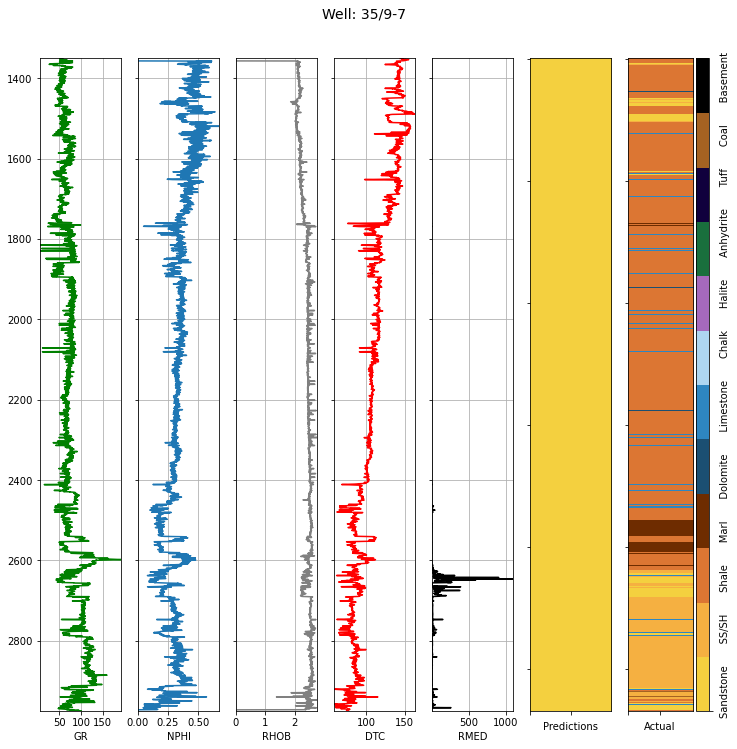

In [12]:
facies.compare_lithofacies(df[110000:], labels, predictions, log1='GR', log2='NPHI',
                           log3='RHOB', log4='DTC', log5='RMED', depth_col='DEPTH_MD')

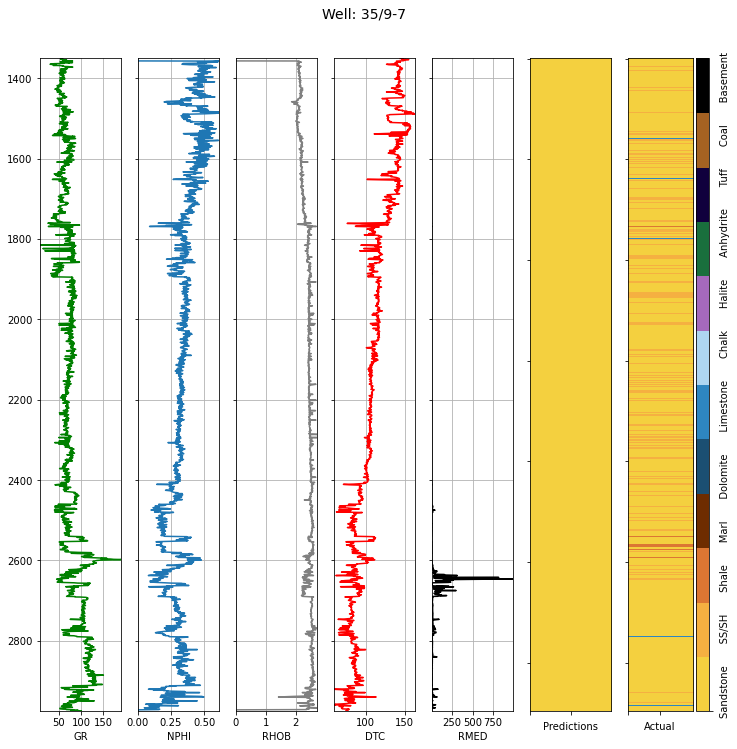

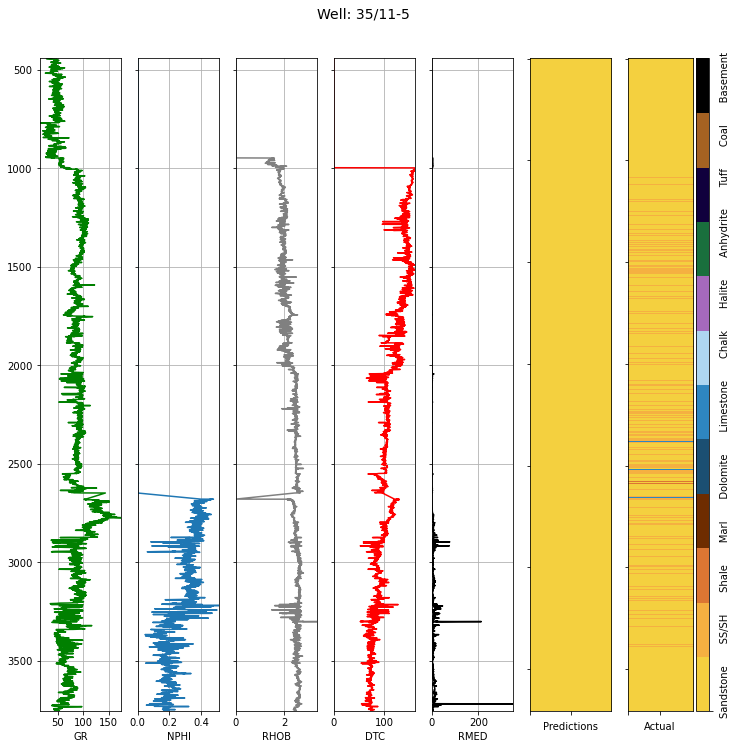

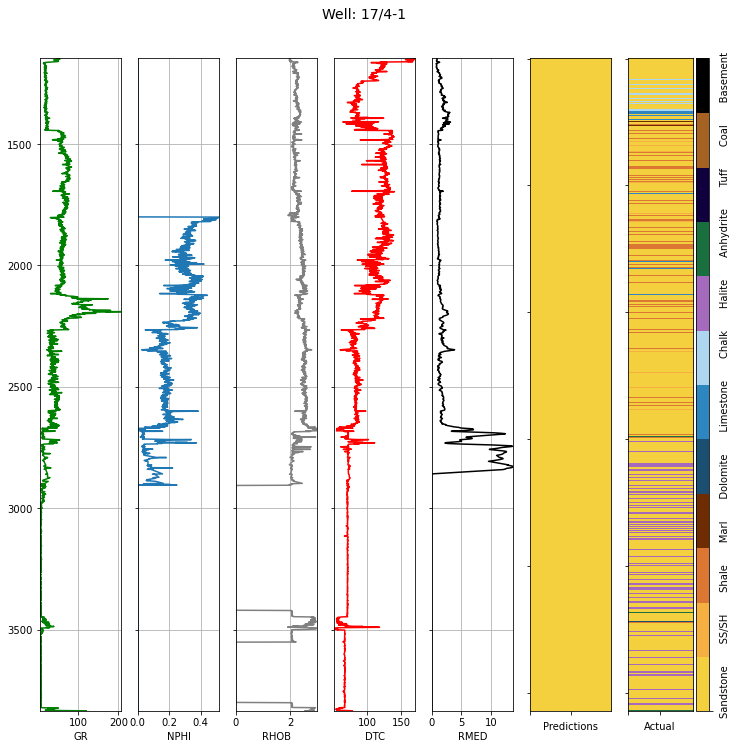

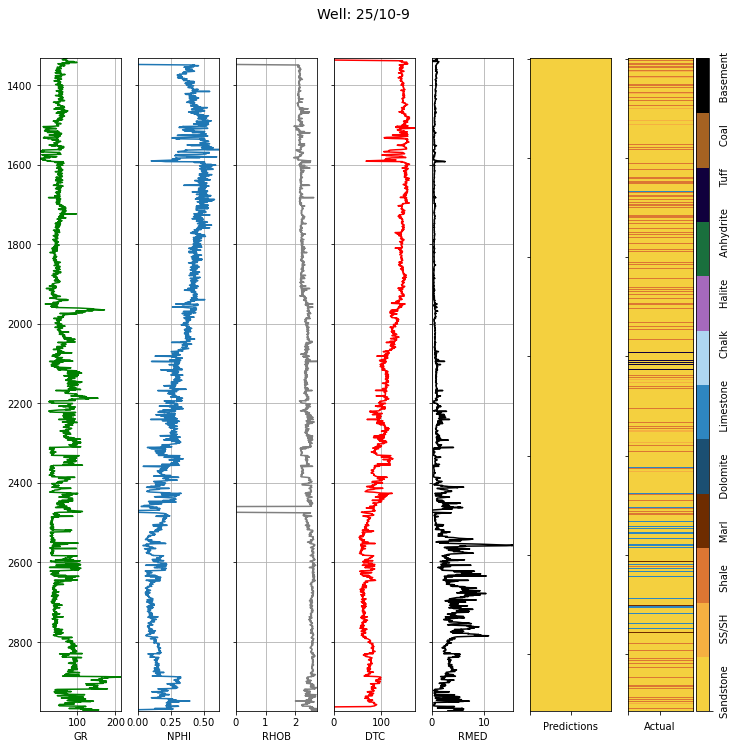

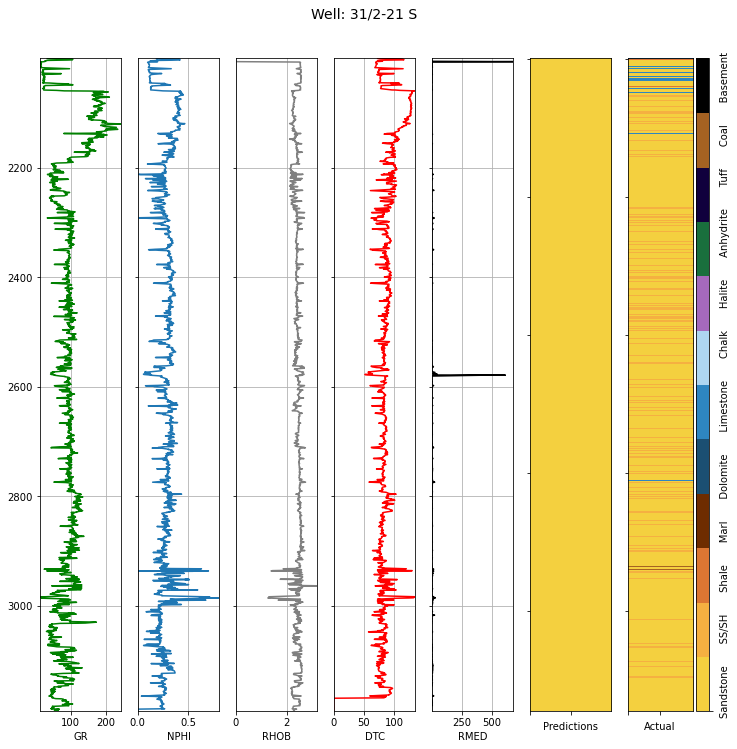

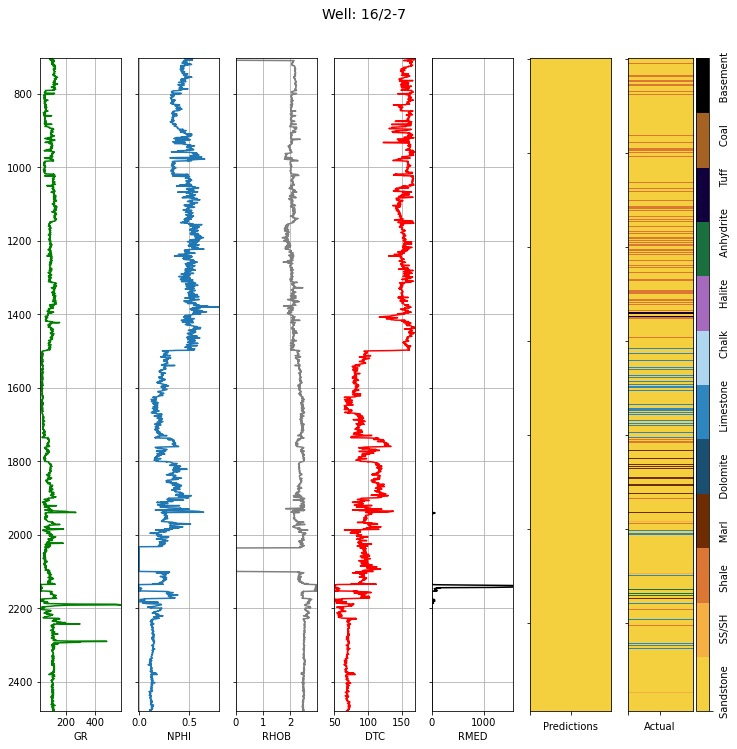

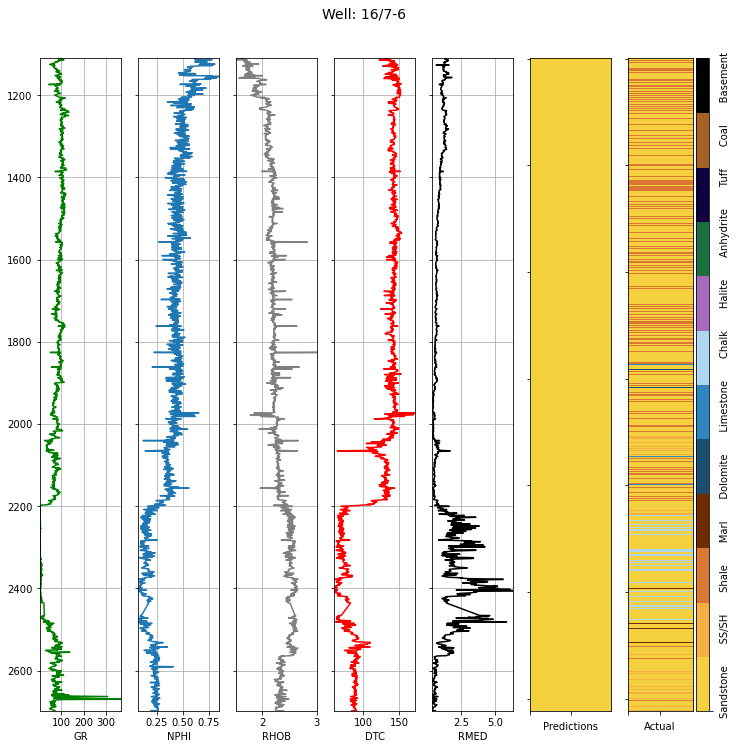

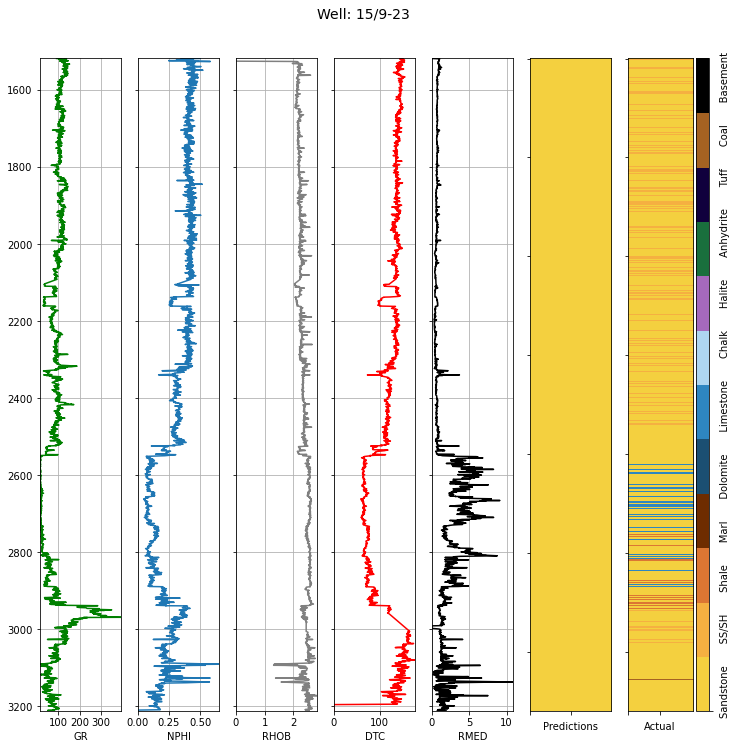

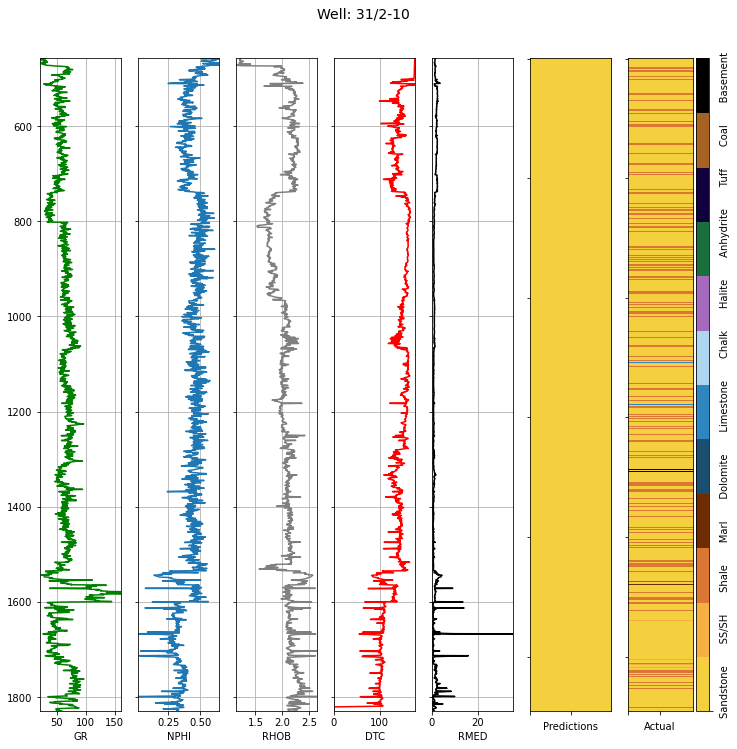

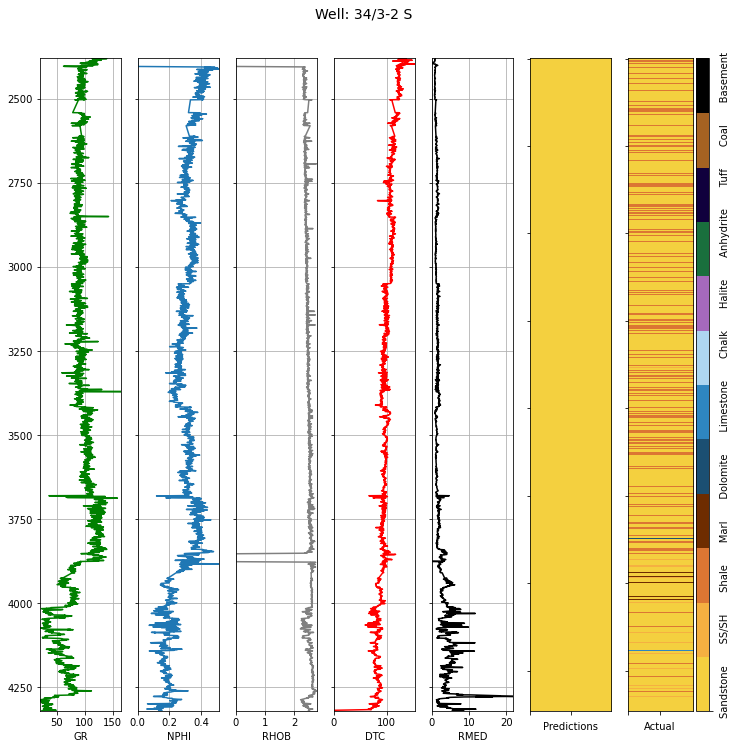

In [27]:
facies.compare_lithofacies(X_test, labels, predictions, log1='GR', log2='NPHI',
                           log3='RHOB', log4='DTC', log5='RMED', depth_col='DEPTH_MD')